<a href="https://colab.research.google.com/github/abdinegara783/ISFEST2023/blob/main/FEATURE_SELECTION_%2BMODELING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NONFEATURE SELECTION**

In [24]:
!pip install lazypredict

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [2]:
#membaca Dataset
df=pd.read_csv('/content/FEATURE_ENGINERING.csv')
df.head(5)

,url,title,address,district,city,lat,long,bedrooms,bathrooms,land_size_m2,...,certificate_Tidak diketahui,certificate_hgb - hak guna bangunan,certificate_hp - hak pakai,"certificate_lainnya (ppjb,girik,adat,dll)",certificate_shm - sertifikat hak milik,furnishing_Tidak diketahui,furnishing_baru,furnishing_furnished,furnishing_semi furnished,furnishing_unfurnished
0,https://www.rumah123.com/properti/bekasi/hos11...,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,4.0,4.0,239.0,...,0,0,0,0,1,0,0,0,0,1
1,https://www.rumah123.com/properti/bekasi/hos10...,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,3.0,2.0,55.0,...,0,1,0,0,0,1,0,0,0,0
2,https://www.rumah123.com/properti/bekasi/hos10...,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,3.0,3.0,119.0,...,0,1,0,0,0,0,0,0,0,1
3,https://www.rumah123.com/properti/bekasi/hos10...,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,3.0,3.0,180.0,...,0,0,0,0,1,0,0,0,0,1
4,https://www.rumah123.com/properti/bekasi/hos10...,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,4.0,3.0,328.0,...,0,0,0,0,1,0,0,0,0,1


In [17]:
df_baru = df.copy()

In [18]:
# Mencari kolom dengan tipe data non-numerik
kolom_numerik = df_baru.select_dtypes(include=['number']).columns
df_numerik = df_baru[kolom_numerik]

In [5]:
df_numerik

,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,...,certificate_Tidak diketahui,certificate_hgb - hak guna bangunan,certificate_hp - hak pakai,"certificate_lainnya (ppjb,girik,adat,dll)",certificate_shm - sertifikat hak milik,furnishing_Tidak diketahui,furnishing_baru,furnishing_furnished,furnishing_semi furnished,furnishing_unfurnished
0,-6.223945,106.986275,4.0,4.0,239.0,272.0,0,0,1,2.0,...,0,0,0,0,1,0,0,0,0,1
1,-6.223945,106.986275,3.0,2.0,55.0,69.0,1,0,0,2.0,...,0,1,0,0,0,1,0,0,0,0
2,-6.223945,106.986275,3.0,3.0,119.0,131.0,1,1,1,2.0,...,0,1,0,0,0,0,0,0,0,1
3,-6.223945,106.986275,3.0,3.0,180.0,174.0,0,1,1,2.0,...,0,0,0,0,1,0,0,0,0,1
4,-6.223945,106.986275,4.0,3.0,328.0,196.0,2,1,1,2.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,-6.296615,106.704601,2.0,1.0,72.0,36.0,1,0,0,1.0,...,0,0,0,0,1,0,0,1,0,0
3549,-6.283454,106.638775,3.0,2.0,85.0,60.0,1,0,0,2.0,...,0,0,0,0,1,0,0,0,0,1
3550,-6.283454,106.638775,3.0,2.0,78.0,60.0,1,0,0,2.0,...,0,0,0,0,1,0,0,0,0,1
3551,-6.288237,106.665859,3.0,2.0,60.0,65.0,2,0,0,2.0,...,0,0,0,0,1,0,0,1,0,0


In [19]:
df_rescale = df_numerik[['lat','long','land_size_m2',	'building_size_m2','electricity']]

In [20]:
# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom-kolom dalam dataframe
df_normalized = pd.DataFrame(scaler.fit_transform(df_rescale), columns=df_rescale.columns)


In [21]:
df_numerik[['lat','long','land_size_m2',	'building_size_m2','electricity']] = df_normalized[['lat','long','land_size_m2',	'building_size_m2','electricity']]

<ipython-input-21-d207bd2cde55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerik[['lat','long','land_size_m2',	'building_size_m2','electricity']] = df_normalized[['lat','long','land_size_m2',	'building_size_m2','electricity']]


In [28]:
y = df_numerik['price_in_rp']
X = df_numerik.drop('price_in_rp', axis = 1)

In [30]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat LazyRegressor dan lakukan prediksi
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Tampilkan hasil
print(models)
print(predictions)

100%|██████████| 42/42 [06:25<00:00,  9.18s/it]

                                                              Adjusted R-Squared  \
Model                                                                              
GradientBoostingRegressor                                                   0.47   
ElasticNet                                                                  0.38   
HistGradientBoostingRegressor                                               0.38   
TweedieRegressor                                                            0.38   
LarsCV                                                                      0.34   
LassoLarsCV                                                                 0.34   
LassoCV                                                                     0.34   
LassoLarsIC                                                                 0.34   
LassoLars                                                                   0.33   
LGBMRegressor                                                               

#**WITH FITURE SELECTION**

In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

# Metode Univariate Selection (Chi-square)
best_features = SelectKBest(score_func=chi2, k=2)
X_new = best_features.fit_transform(X, y)
selected_features = X.columns[best_features.get_support()]

print("Univariate Selection (Chi-square):")
print("Selected Features:", selected_features.tolist())
print()

# Metode Feature Importance
model = RandomForestClassifier()
model.fit(X, y)
importance = model.feature_importances_
selected_features = X.columns[np.argsort(importance)[::-1][:2]]

print("Feature Importance:")
print("Selected Features:", selected_features.tolist())
print()

# Metode Correlation Matrix
correlation_matrix = df.corr()
selected_features = correlation_matrix['price_in_rp'].abs().sort_values(ascending=False)[:2].index.tolist()

print("Correlation Matrix:")
print("Selected Features:", selected_features)
print()

# Metode Recursive Feature Elimination
lasso = LassoCV()
rfecv = RFECV(estimator=lasso)
X_new = rfecv.fit_transform(X, y)
selected_features = X.columns[rfecv.support_]

print("Recursive Feature Elimination:")
print("Selected Features:", selected_features.tolist())


Univariate Selection (Chi-square):
Selected Features: ['num_facilities', 'Free kitchen set']

Feature Importance:
Selected Features: ['building_size_m2', 'land_size_m2']

Correlation Matrix:
Selected Features: ['price_in_rp', 'building_size_m2']

Recursive Feature Elimination:
Selected Features: ['building_size_m2']


In [35]:
def correlation_score(x, y):
    # Menghitung koefisien korelasi Pearson antara setiap variabel dalam x dengan y
    correlation_scores = []
    for column in x.columns:
        correlation_matrix = np.corrcoef(x[column], y)
        correlation_score = correlation_matrix[0, 1]
        correlation_scores.append(correlation_score)

    return correlation_scores
scores = correlation_score(X, y)
for i, column in enumerate(X.columns):
    print("Korelasi antara", column, "dan Y:", scores[i])

Korelasi antara lat dan Y: 0.10257247232306058
Korelasi antara long dan Y: -0.056808605944204525
Korelasi antara bedrooms dan Y: 0.2816531346128691
Korelasi antara bathrooms dan Y: 0.16065020354405243
Korelasi antara land_size_m2 dan Y: 0.371806148089317
Korelasi antara building_size_m2 dan Y: 0.48874253729603734
Korelasi antara carports dan Y: 0.06360038125138058
Korelasi antara maid_bedrooms dan Y: 0.3328511925213518
Korelasi antara maid_bathrooms dan Y: 0.240662915464248
Korelasi antara floors dan Y: 0.14085320784789718
Korelasi antara garages dan Y: 0.06881900189941867
Korelasi antara num_facilities dan Y: 0.014577578149629292
Korelasi antara  1 unit AC dan Y: -0.0034069600742376916
Korelasi antara  AC dan Y: 0.04080099904666577
Korelasi antara  AC 3 unit dan Y: -0.0015763665344534874
Korelasi antara  Ac dan Y: 0.04391123244115598
Korelasi antara  Akses Parkir dan Y: -0.033431134910441924
Korelasi antara  Balkon dan Y: -0.0033215323757144278
Korelasi antara  Basement dan Y: -0.0030

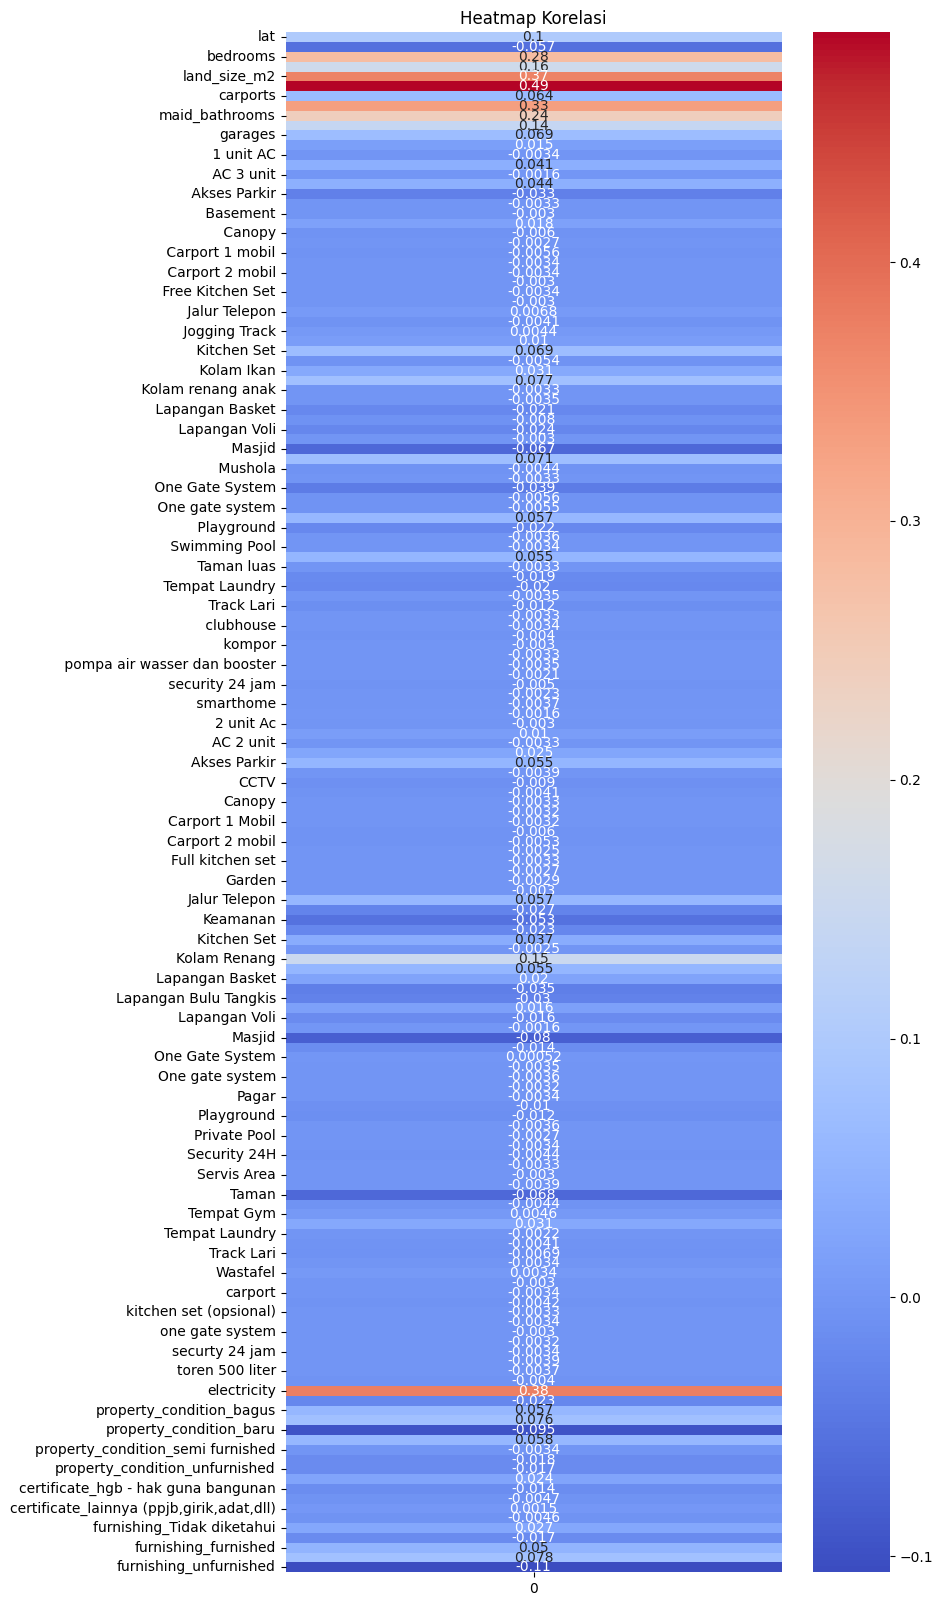

In [37]:
def correlation_heatmap(x, y):
    # Menghitung matriks korelasi
    correlation_matrix = x.corrwith(y)

    # Membuat heatmap
    plt.figure(figsize=(8, 20))
    sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap="coolwarm", cbar=True)
    plt.title("Heatmap Korelasi")
    plt.show()
correlation_heatmap(X, y)

In [38]:

def correlation_features(x, y, threshold):
    # Menghitung koefisien korelasi Pearson antara setiap fitur dalam x dengan y
    correlation_scores = x.corrwith(y)

    # Mengambil fitur dengan skor korelasi di atas threshold
    selected_features = correlation_scores[(correlation_scores > threshold) | (correlation_scores < -threshold)].index.tolist()

    return selected_features


threshold = 0.2
selected_features = correlation_features(X, y, threshold)
print("Selected Features:", selected_features)

Selected Features: ['bedrooms', 'land_size_m2', 'building_size_m2', 'maid_bedrooms', 'maid_bathrooms', 'electricity']


In [39]:
X=X[selected_features]
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat LazyRegressor dan lakukan prediksi
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Tampilkan hasil
print(models)
print(predictions)

100%|██████████| 42/42 [03:44<00:00,  5.35s/it]

                               Adjusted R-Squared  R-Squared             RMSE  \
Model                                                                           
ExtraTreesRegressor                          0.52       0.52    5891604446.81   
ElasticNet                                   0.50       0.50    6038042006.78   
TweedieRegressor                             0.49       0.50    6043743902.31   
LassoLarsCV                                  0.47       0.47    6204938362.04   
LarsCV                                       0.47       0.47    6204938362.04   
SGDRegressor                                 0.47       0.47    6207279141.07   
LassoCV                                      0.47       0.47    6208500651.25   
HistGradientBoostingRegressor                0.46       0.46    6257355371.58   
RidgeCV                                      0.45       0.46    6283042671.80   
Ridge                                        0.45       0.46    6286338734.63   
LassoLars                   